# 딥러닝 모델 실습
---
## Fashion MNIST 모델
---
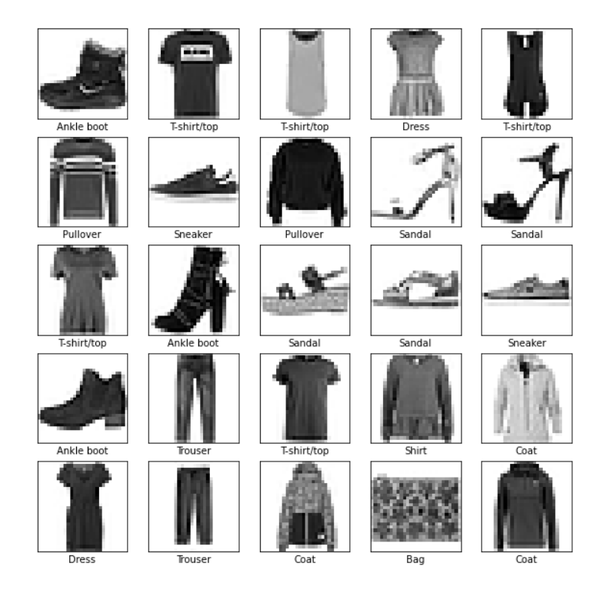  
Fashion MNIST는 이미지 분류의 대표적인 데이터셋인 MNIST 손글씨 숫자 인식과 유사하게  
패션 이미지로 10개의 종류를 가지는 데이터셋  
MNIST 손글씨 숫자 인식보다는 어려운 형태로 구성  

### 데이터 로드

In [1]:
# Fashion MNIST 데이터셋은 케라스에 내장되어 있으며 fashion_mnist를 임포트
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

# load_data()를 호출하여 데이터셋을 로드
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

# 학습용 데이터셋에서 30% 정도를 검증용 데이터셋으로 만들기 위해서 train_test_split() 함수를 이용해 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

4431872/4422102 [==============================] - 0s 0us/step
전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [2]:
# Fashion MNIST 데이터셋에서 사용되는 총 10개의 클래스 이름을 class_names 변수로 지정
# 클래스 이름은 Fashion MNIST 깃헙에서 확인 가능
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

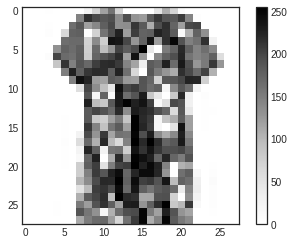

In [3]:
# 학습 데이터는 이미지라서 0~255의 값
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure()

# 이미지로 imshow()를 이용해 출력
plt.imshow(x_train[0])

# 값의 범위를 보기 위해 colorbar()를 이용해 출력
plt.colorbar()
plt.show()


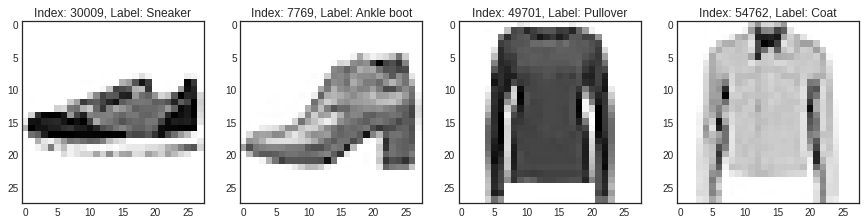

In [4]:
import numpy as np

'''
Fashion MNIST 데이터셋을 확인하기 위해서 
전체 학습 데이터 60,000개 중에서 랜덤으로 4개를 선택
인덱스와 레이블, 그리고 해당 패션 이미지를 출력
'''
num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title(f'Index: {idx}, Label: {class_names[label]}')

### 데이터 전처리
딥러닝 모델에서 효과적으로 학습시키기 위해서 입력 데이터를 적절하게 전처리 해주어야 합니다.  

데이터셋 구성
- 28 x 28 크기의 이미지
- 학습 데이터 42,000개  
- 검증 데이터 18,000개
- 테스트 데이터 10,000개

In [5]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


In [6]:
'''
딥러닝 모델에서 Flatten 레이어를 거쳐도 가능하지만, 
미리 데이터셋을 reshape()를 통해 28 * 28 크기인 784로 모양을 바꾸어줍니다. 

여기서 reshape()을 할 때, 
훈련 데이터는 (42000, 784), 
검증 데이터는 (18000, 784), 
테스트 데이터는 (10000, 784)로 지정해도 되지만, 

28 * 28로만 지정하고 나머지는 -1로 지정하여 자동으로 모양을 맞추도록 하였습니다.
'''
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [7]:
'''
기존 데이터셋을 255.0으로 나눠 0 ~ 255 숫자 범위를 0 ~ 1의 범위로 줄인다
'''
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

### 모델 구성

In [8]:
from tensorflow.keras import models, layers

# Fashion MNIST 데이터셋을 패션 종류별로 분류하기 위한 딥러닝 모델을 정의하기 위해 Sequential() 함수를 사용
model = models.Sequential()

# 첫번째 입력 레이어 Input - 전처리에서 바꾼 모양대로 784개의 형태를 가지도록 한다
model.add(layers.Input(shape=(784, )))

# 두 번째 레이어는 유닛수 512개와 sigmoid 활성화 함수를 가지는 Dense 레이어를 추가
model.add(layers.Dense(512, activation='sigmoid'))

# 마지막은 분류 갯수인 10으로 유닛수를 지정하고, softmax 활성화 함수를 사용하는 Dense 레이어를 추가
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일 및 학습

In [9]:
'''
옵티마이저 : SGD
손실 함수 : sparse_categorical_crossentropy (다중 분류, 정수 인코딩)
지표 : accuracy 사용
'''
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [10]:
'''
학습용 데이터셋 : x_train, y_train
에폭(epochs) : 60
배치 사이즈 : 512
검증 데이터 : x_val, y_val
'''
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
83/83 [==============================] - 2s 7ms/step - loss: 2.1710 - accuracy: 0.4109 - val_loss: 2.0205 - val_accuracy: 0.4933
Epoch 2/60
83/83 [==============================] - 0s 4ms/step - loss: 1.9013 - accuracy: 0.6212 - val_loss: 1.7917 - val_accuracy: 0.6385
Epoch 3/60
83/83 [==============================] - 0s 5ms/step - loss: 1.7014 - accuracy: 0.6623 - val_loss: 1.6190 - val_accuracy: 0.6140
Epoch 4/60
83/83 [==============================] - 0s 4ms/step - loss: 1.5431 - accuracy: 0.6720 - val_loss: 1.4788 - val_accuracy: 0.6475
Epoch 5/60
83/83 [==============================] - 0s 4ms/step - loss: 1.4168 - accuracy: 0.6859 - val_loss: 1.3632 - val_accuracy: 0.6991
Epoch 6/60
83/83 [==============================] - 0s 4ms/step - loss: 1.3155 - accuracy: 0.6988 - val_loss: 1.2756 - val_accuracy: 0.6889
Epoch 7/60
83/83 [==============================] - 0s 4ms/step - loss: 1.2337 - accuracy: 0.7021 - val_loss: 1.1995 - val_accuracy: 0.6961
Epoch 8/60
83/83 [==

In [11]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

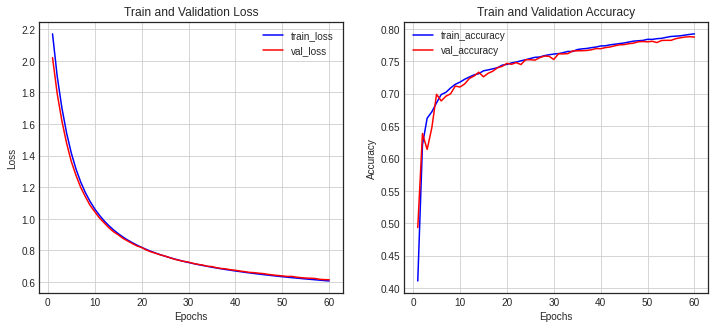

In [12]:
show_history(history)

### 모델 평가 및 예측

In [13]:
'''
모델이 학습한 결과를 평가하기 위해서는 테스트 데이터셋인 x_test와 y_test를 지정하여 evaluate()를 실행
실행 결과로는 모델이 테스트 데이터셋에서는 어느 정도의 성능이 나오는지 loss와 accuracy 값을 살펴볼 수 있습니다.
'''
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6270 - accuracy: 0.7791


[0.6269763112068176, 0.7791000008583069]

In [14]:
# 학습된 모델을 이용해서 예측을 하기 위해서는 predict()를 실행
pred_ys = model.predict(x_test)

# 테스트 데이터 셋인 x_test에 대해 모델의 예측 결과인 pred_ys 중에 5번째를 출력
print(pred_ys[5])

# 분류 10개의 각 값들 중에 가장 큰 값이 있는 위치를 반환하도록 argmax()를 수행한 결과를 arg_pred_y에 저장
arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

[1.0695954e-02 9.4288719e-01 3.6105455e-03 1.5732216e-02 1.9246310e-02
 4.3559943e-05 7.6033524e-03 6.5085304e-05 9.8742312e-05 1.7044609e-05]
1
Trouser


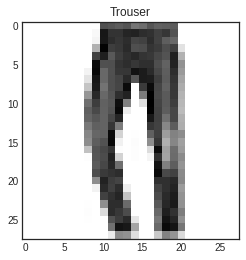

In [15]:
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

In [16]:
'''
이미지와 레이블을 함께 출력하기 위해서 plot_image() 함수를 정의

모델이 예측한 값인 pred_ys
테스트 데이터셋의 정답인 y_test
이미지 img에 대해서 i 번째를 가져와서 출력

예측한 결과 레이블인 predicted_label과 정답 레이블인 y_test 비교
- 동일하면 색으로 blue
- 다르면 red

예측한 레이블의 이름, 예측한 확률값, 실제 정답 레이블의 이름을 지정한 색으로 출력
'''
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

In [17]:
'''
전체 10개 분류 중에서 어떤 클래스에 얼만큼의 확률로 예측을 했는지 출력해주는 plot_class() 함수를 정의

예측한 결과 레이블인 pred_ys와 정답 레이블인 true_label에서 i 번째의 데이터에 대한 10개 클래스 값들을 바 차트로 시각화

기본적으로는 색을 darkgray로 지정
예측한 레이블은 red 색상으로 표시
정답 레이블은 blue 색상으로 표시
'''
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

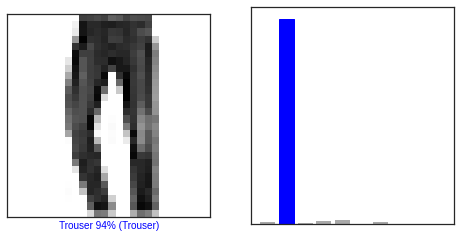

In [18]:
'''
5번째 데이터에 대해서 정의한 plot_image()와 plot_class() 함수를 호출하여 시각화
결과를 보면 모델이 Trouser라고 95% 확률로 예측한 것을 알 수 있습니다.
'''
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

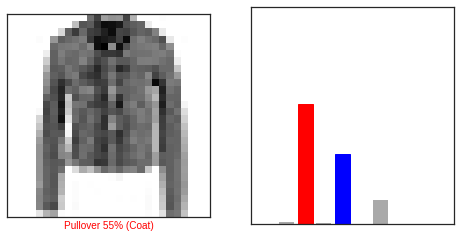

In [19]:
'''
10번째 데이터에 대해서도 출력
그러나 결과를 보면, 모델은 Pullover로 예측을 했지만, 실제 정답은 Coat인 것으로 알 수 있습니다.
'''
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

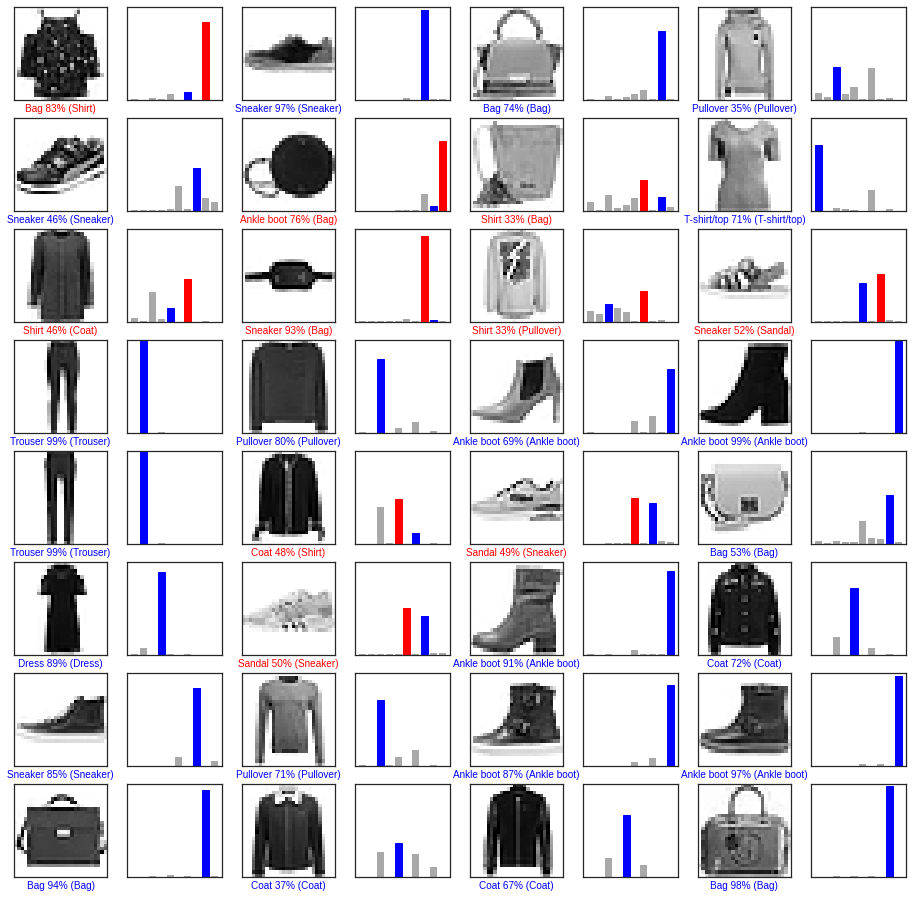

In [20]:
# 모델 예측 결과 여러 개를 눈으로 확인할 수 있도록 32(8x4)개를 출력
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [21]:
'''
classification_report를 이용
Fashion MNIST를 분류하는 모델의 결과를 10개 분류 기준 별
precision, recall, f1-score, support를 살펴볼 수 있습니다.
'''
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.76      0.77      0.77      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.68      0.64      0.66      1000
       Dress       0.76      0.84      0.80      1000
        Coat       0.67      0.67      0.67      1000
      Sandal       0.85      0.80      0.83      1000
       Shirt       0.48      0.46      0.47      1000
     Sneaker       0.80      0.88      0.84      1000
         Bag       0.92      0.91      0.91      1000
  Ankle boot       0.89      0.90      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



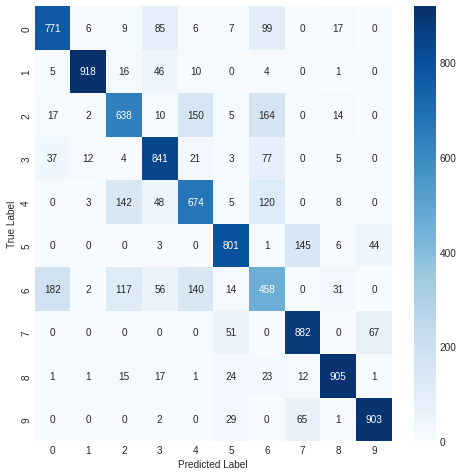

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# confusion_matrix를 이용해서 예측한 레이블과 실제 레이블과의 일치 여부를 혼동 행렬(confusion matrix)로 시각화
plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

---
## 모델 최적화
---
### Early Stopping


In [23]:
'''
콜백 함수로 ModelCheckpoint를 사용
- 딥러닝 모델이 학습을 진행하면서 가장 좋은 모델이 fashion_mnist_model.h5 파일로 저장

EarlyStopping을 사용
- val_loss 값을 10개씩 연속으로 모니터링하며 성능 변화가 없으면 조기 종료
'''
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5930 - accuracy: 0.7960 - val_loss: 0.5855 - val_accuracy: 0.7996
Epoch 2/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5660 - accuracy: 0.8034 - val_loss: 0.5633 - val_accuracy: 0.8031
Epoch 3/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5453 - accuracy: 0.8099 - val_loss: 0.5455 - val_accuracy: 0.8126
Epoch 4/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5296 - accuracy: 0.8153 - val_loss: 0.5331 - val_accuracy: 0.8140
Epoch 5/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5163 - accuracy: 0.8197 - val_loss: 0.5191 - val_accuracy: 0.8212
Epoch 6/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5053 - accuracy: 0.8232 - val_loss: 0.5140 - val_accuracy: 0.8200
Epoch 7/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4962 - accuracy: 0.8273 - val_loss: 0.5087 - val_accuracy:

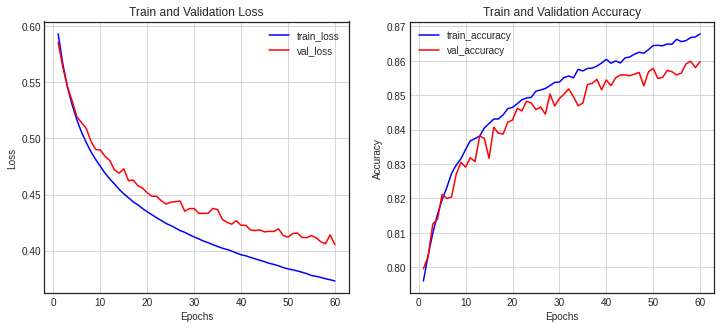

In [24]:
# 모델의 학습 히스토리를 시각화
show_history(history)

In [25]:
# 모델의 평가 결과도 테스트 데이터셋을 이용해 확인
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4245 - accuracy: 0.8466


[0.42453959584236145, 0.8465999960899353]

### 활성화 함수

In [28]:
# 기존 모델 활성화 함수로 선형 함수인 sigmoid를 사용하였는데, 비선형 함수인 relu로 변경
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [29]:
history2 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7796 - accuracy: 0.7551 - val_loss: 0.5778 - val_accuracy: 0.8122
Epoch 2/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5310 - accuracy: 0.8215 - val_loss: 0.5062 - val_accuracy: 0.8305
Epoch 3/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4798 - accuracy: 0.8353 - val_loss: 0.4807 - val_accuracy: 0.8357
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4523 - accuracy: 0.8438 - val_loss: 0.4661 - val_accuracy: 0.8416
Epoch 5/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4330 - accuracy: 0.8490 - val_loss: 0.4380 - val_accuracy: 0.8511
Epoch 6/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4173 - accuracy: 0.8550 - val_loss: 0.4914 - val_accuracy: 0.8232
Epoch 7/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4059 - accuracy: 0.8587 - val_loss: 0.4288 - val_accuracy:

In [31]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

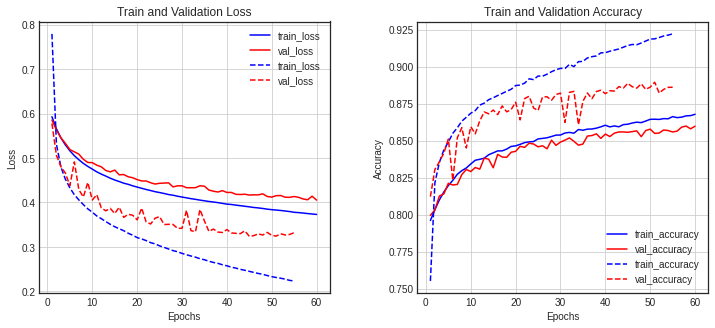

In [32]:
diff_history(history, history2)

In [33]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8779


[0.34506332874298096, 0.8779000043869019]

### 옵티마이저

In [34]:
# 기존 모델 옵티마이저 SGD를, 좀 더 빠르고 효과적인 학습이 가능하도록 Adam으로 변경
from tensorflow.keras.optimizers import Adam

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [35]:
history3 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5052 - accuracy: 0.8194 - val_loss: 0.4206 - val_accuracy: 0.8513
Epoch 2/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3797 - accuracy: 0.8594 - val_loss: 0.3591 - val_accuracy: 0.8696
Epoch 3/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3359 - accuracy: 0.8762 - val_loss: 0.3824 - val_accuracy: 0.8614
Epoch 4/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3076 - accuracy: 0.8848 - val_loss: 0.3529 - val_accuracy: 0.8761
Epoch 5/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2895 - accuracy: 0.8921 - val_loss: 0.3390 - val_accuracy: 0.8788
Epoch 6/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2738 - accuracy: 0.8990 - val_loss: 0.3325 - val_accuracy: 0.8804
Epoch 7/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2587 - accuracy: 0.9025 - val_loss: 0.3101 - val_accuracy:

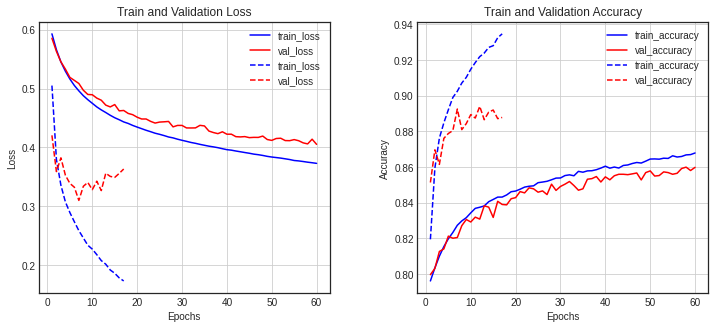

In [36]:
diff_history(history, history3)

In [37]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3343 - accuracy: 0.8807


[0.33432188630104065, 0.8806999921798706]

### 규제

In [38]:
'''
모델에서 과대적합이 발생하는 부분을 규제하기 위해서 중간의 Dense 레이어에 L2 규제 방법을 적용
'''
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [39]:
history4 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.1126 - accuracy: 0.7756 - val_loss: 0.7083 - val_accuracy: 0.8039
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7245 - accuracy: 0.7940 - val_loss: 0.7328 - val_accuracy: 0.7948
Epoch 3/60
1313/1313 [==============================] - 5s 3ms/step - loss: 0.6912 - accuracy: 0.8037 - val_loss: 0.7138 - val_accuracy: 0.7933
Epoch 4/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.6582 - accuracy: 0.8120 - val_loss: 0.6477 - val_accuracy: 0.8138
Epoch 5/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.6274 - accuracy: 0.8201 - val_loss: 0.6641 - val_accuracy: 0.8060
Epoch 6/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.6155 - accuracy: 0.8220 - val_loss: 0.5936 - val_accuracy: 0.8370
Epoch 7/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5991 - accuracy: 0.8253 - val_loss: 0.6871 - val_accuracy:

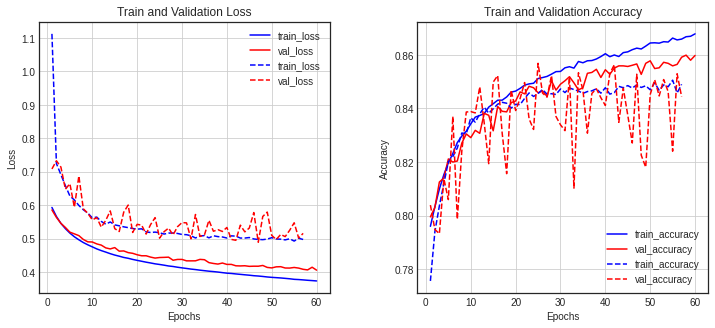

In [41]:
diff_history(history, history4)

In [42]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5063 - accuracy: 0.8469


[0.5062683820724487, 0.8468999862670898]

### 드롭아웃

In [43]:
'''
모델에서 성능 저하를 최소화하면서 과대적합을 억제하기 위한 방법으로
Dense 레이어 사이에 50%의 Dropout 레이어를 적용
'''
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [44]:
history5 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 5s 3ms/step - loss: 1.2622 - accuracy: 0.7435 - val_loss: 0.8035 - val_accuracy: 0.8009
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.8660 - accuracy: 0.7566 - val_loss: 0.7290 - val_accuracy: 0.8097
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.8327 - accuracy: 0.7617 - val_loss: 0.7380 - val_accuracy: 0.8049
Epoch 4/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.8238 - accuracy: 0.7632 - val_loss: 0.7026 - val_accuracy: 0.8139
Epoch 5/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.8044 - accuracy: 0.7675 - val_loss: 0.7266 - val_accuracy: 0.7934
Epoch 6/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.7910 - accuracy: 0.7709 - val_loss: 0.7095 - val_accuracy: 0.8043
Epoch 7/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.7932 - accuracy: 0.7676 - val_loss: 0.6989 - val_accuracy:

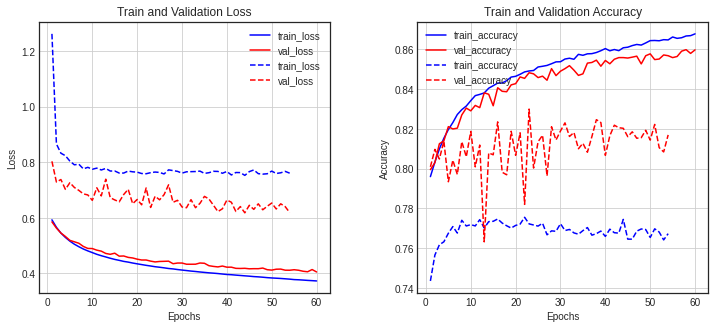

In [45]:
diff_history(history, history5)

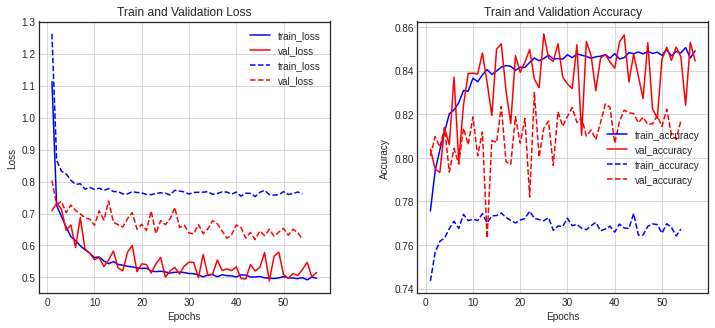

In [46]:
diff_history(history4, history5)

In [47]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6369 - accuracy: 0.8155


[0.6368944048881531, 0.815500020980835]

### 배치 정규화

In [50]:
'''
빠르고 효과적인 학습을 도와주는 배치 정규화도 적용
Dense 레이어 다음에 BatchNormalization 레이어를 추가 이후 활성화 함수 Activation 레이어를 추가
'''
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 409,098
Trainable params: 408,074
Non-trainable params: 1,024
_________________________________________________________________


In [51]:
history6 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 5s 4ms/step - loss: 1.1810 - accuracy: 0.7933 - val_loss: 1.0760 - val_accuracy: 0.6716
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7565 - accuracy: 0.7993 - val_loss: 0.7768 - val_accuracy: 0.7942
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7244 - accuracy: 0.8084 - val_loss: 0.9394 - val_accuracy: 0.7133
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6846 - accuracy: 0.8162 - val_loss: 0.7426 - val_accuracy: 0.7935
Epoch 5/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.6634 - accuracy: 0.8196 - val_loss: 0.7534 - val_accuracy: 0.7682
Epoch 6/60
1313/1313 [==============================] - 6s 5ms/step - loss: 0.6295 - accuracy: 0.8256 - val_loss: 0.7941 - val_accuracy: 0.7651
Epoch 7/60
1313/1313 [==============================] - 6s 5ms/step - loss: 0.6101 - accuracy: 0.8295 - val_loss: 0.7392 - val_accuracy:

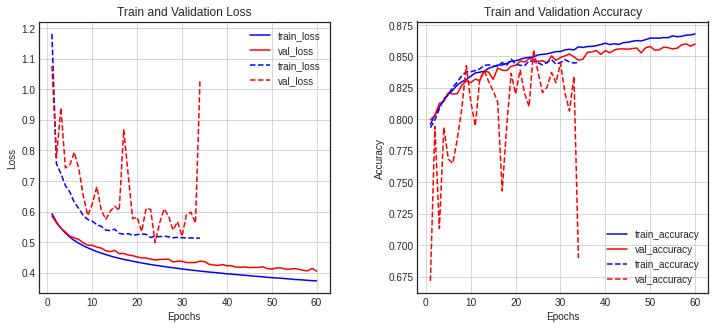

In [52]:
diff_history(history, history6)

In [53]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5188 - accuracy: 0.8477


[0.5187743902206421, 0.8476999998092651]

### 배치 정규화 + 드롭아웃

In [54]:
'''
배치 정규화를 통해 안정적인 학습이 가능하지만, 규제 방법 중 좋은 성능을 보였던 드롭아웃을 함께 적용
기존 배치 정규화를 적용한 모델에 Activation 레이어 이후에 Dropout 레이어를 추가
'''
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 409,098
Trainable params: 408,074
Non-trainable params: 1,024
_________________________________________________________________


In [55]:
history7 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 5s 4ms/step - loss: 1.4584 - accuracy: 0.7645 - val_loss: 1.0083 - val_accuracy: 0.7367
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9080 - accuracy: 0.7737 - val_loss: 1.0349 - val_accuracy: 0.7255
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9049 - accuracy: 0.7744 - val_loss: 0.8747 - val_accuracy: 0.7839
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9086 - accuracy: 0.7760 - val_loss: 0.9057 - val_accuracy: 0.7688
Epoch 5/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9016 - accuracy: 0.7773 - val_loss: 1.0552 - val_accuracy: 0.6904
Epoch 6/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.8966 - accuracy: 0.7772 - val_loss: 0.9525 - val_accuracy: 0.7496
Epoch 7/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.8949 - accuracy: 0.7790 - val_loss: 1.0262 - val_accuracy:

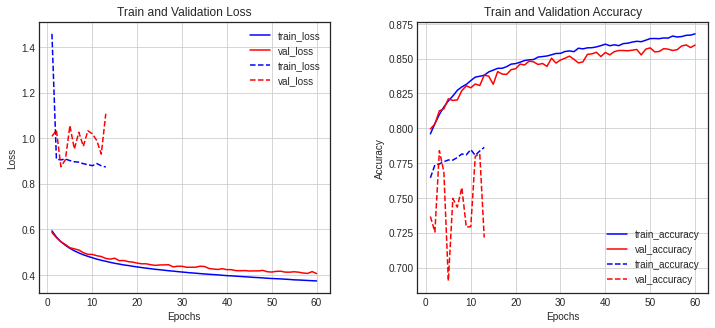

In [56]:
diff_history(history, history7)

In [57]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8961 - accuracy: 0.7757


[0.8960583806037903, 0.7756999731063843]

### 모델 결과 분석

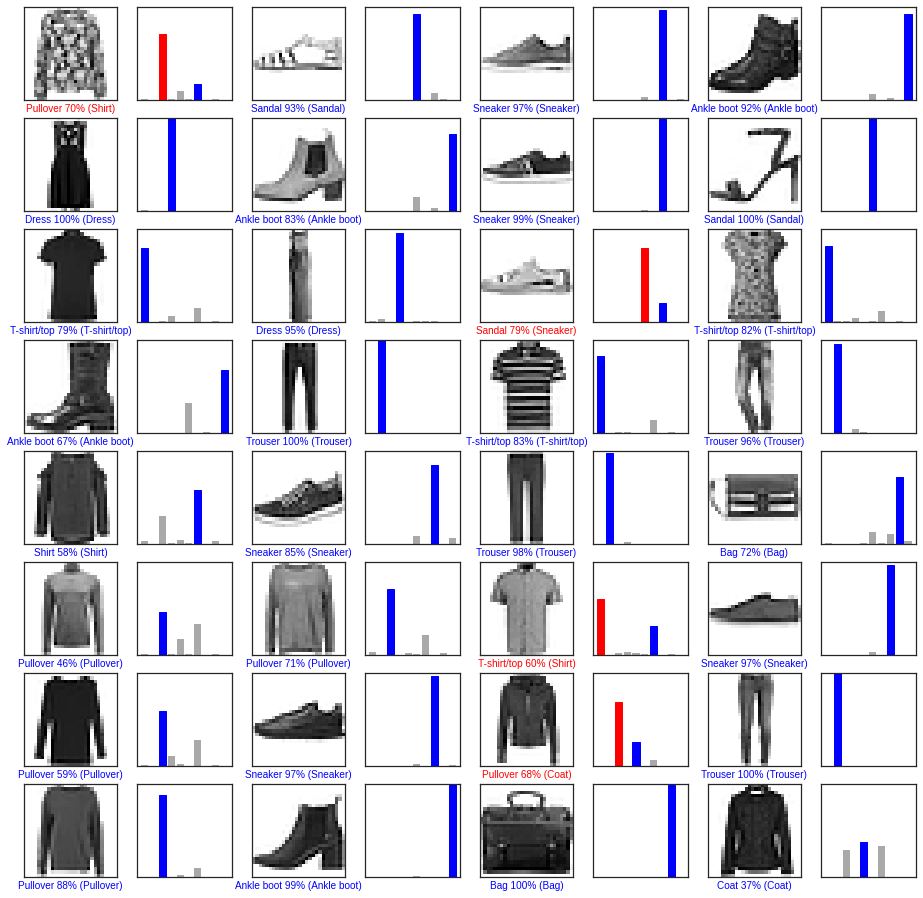

In [58]:
# 학습된 모델을 이용해서 예측을 하기 위해서는 predict()를 실행
pred_ys = model.predict(x_test)

# 분류 10개의 각 값들 중에 가장 큰 값이 있는 위치를 반환하도록 argmax()를 수행한 결과를 arg_pred_y에 저장
arg_pred_y = np.argmax(pred_ys, axis=1)

# 모델 예측 결과 여러 개를 눈으로 확인할 수 있도록 32(8x4)개를 출력
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [59]:
# 최적화한 모델의 분류 결과를 클래스별로 성능 지표 확인
y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.73      0.79      0.76      1000
     Trouser       0.98      0.93      0.96      1000
    Pullover       0.60      0.79      0.68      1000
       Dress       0.70      0.89      0.78      1000
        Coat       0.83      0.30      0.44      1000
      Sandal       0.78      0.93      0.85      1000
       Shirt       0.54      0.51      0.52      1000
     Sneaker       0.91      0.83      0.87      1000
         Bag       0.94      0.91      0.92      1000
  Ankle boot       0.88      0.89      0.89      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.77     10000
weighted avg       0.79      0.78      0.77     10000



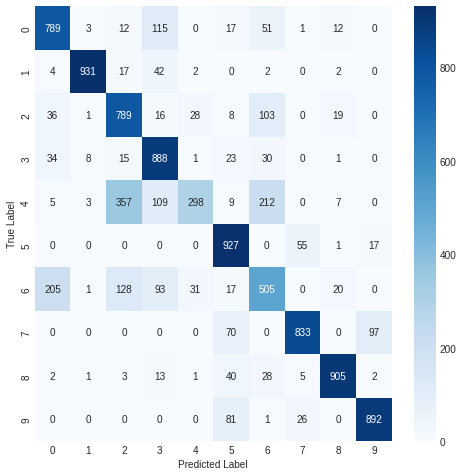

In [60]:
# confusion_matrix를 이용해서 예측한 레이블과 실제 레이블과의 일치 여부를 혼동 행렬(confusion matrix)로 시각화
plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()